In [1]:
import Merge_Cartesian as Merge_Full

from decimal import *
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
L_Time = '10'
C_Time = '1'

L_impedance = '10'
C_impedance = '1'

number_periods = '10'

# Inductor
L_T = Decimal(L_Time)/Decimal('2')
L_Z = Decimal(L_impedance)
L_L = str(L_T*L_Z)
L_C = str(L_T/L_Z)
print("Inductor Inductance   :", L_L)
print("Inductor Capacitance  :", L_C)

# Capacitor
C_T = Decimal(C_Time)/Decimal('2')
C_Z = Decimal(C_impedance)
C_L = str(C_T*C_Z)
C_C = str(C_T/C_Z)
print("Capacitor Inductance  :", C_L)
print("Capacitor Capacitance :", C_C)


#  INDUCTANCE, CAPACITANCE, LENGTH
Inductor_List = [L_L,L_C,'1']
Capacitor_List = [C_L,C_C,'1']

# VOLTAGE, PERIODS, BUCK, LOAD
Circuit_List = ['1',number_periods,False,'12']

Inductor Inductance   : 50
Inductor Capacitance  : 0.5
Capacitor Inductance  : 0.5
Capacitor Capacitance : 0.5


In [3]:
(Storage_Inductor_Completed, 
Storage_Capacitor_Completed,
Voltage_Away,
Current_Away,
Voltage_Return,
Current_Return,
Inductor_Sending_Time,
Capacitor_Sending_Time,
Inductor_Arrival_Time,
Capacitor_Arrival_Time
) = Merge_Full.Process_Wavefronts(Inductor_List,Capacitor_List, Circuit_List)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        50
Inductor Capacitance Per Length :       0.5
Inductor Length :                       1
Inductor Total Inductance :             50
Inductor Total Capacitance :            0.5
Inductor Velocity :                     0.2
Inductor Time Delay :                   5
Inductor Impedance :                    10

- The Capacitor -
Capacitor Inductance Per Length :       0.5
Capacitor Capacitance Per Length :      0.5
Capacitor Length :                      1
Capacitor Total Inductance :            0.5
Capacitor Total Capacitance :           0.5
Capacitor Velocity :                    2
Capacitor Time Delay :                  0.5
Capacitor Impedance :                   1

- The Circuit -
Votage Source Magnitude :               1
Number Periods :                        10
Simulation Stop Time :                  314.159265359000
Number of Wavefronts :                  200344
Number of Layers :            

In [4]:
len(Storage_Inductor_Completed) + len(Storage_Capacitor_Completed)

199712

In [5]:
def to_float(item):
    return float(item)

vectorized_float = np.vectorize(to_float)

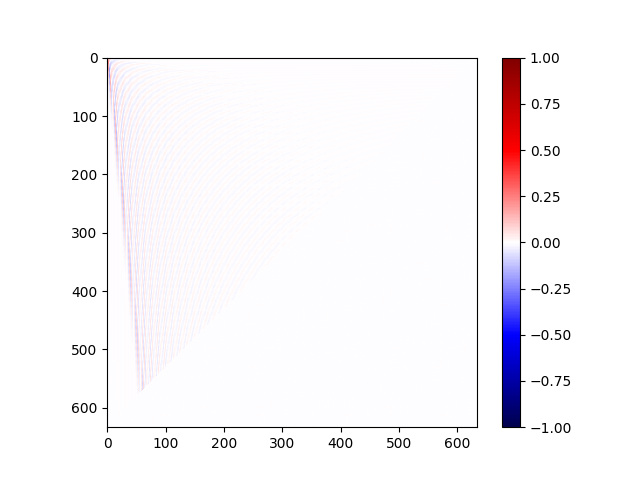

In [6]:
%matplotlib widget
plt.subplots()
Voltage_float = vectorized_float(Voltage_Return)

c = plt.imshow(Voltage_float,cmap=cm.seismic,vmax=1,vmin=-1)
plt.colorbar(c)

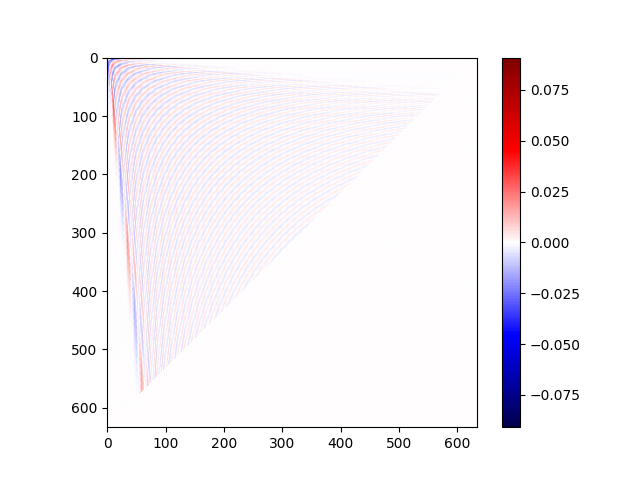

In [7]:
plt.subplots()
Current_float = vectorized_float(Current_Away)

c = plt.imshow(Current_float,cmap=cm.seismic,vmax=float(Merge_Full.Initial_Inductor_Current),vmin=-float(Merge_Full.Initial_Inductor_Current))
plt.colorbar(c)

In [8]:
def delete_alternating(arr):
    
    x_len,ylen = arr.shape
    
    x_delete = np.arange(1,x_len,2)
    y_delete = np.arange(1,ylen,2)

    arr_deleted = np.delete(arr,x_delete, axis=0)
    arr_deleted = np.delete(arr_deleted,y_delete, axis=1)
    
    return arr_deleted

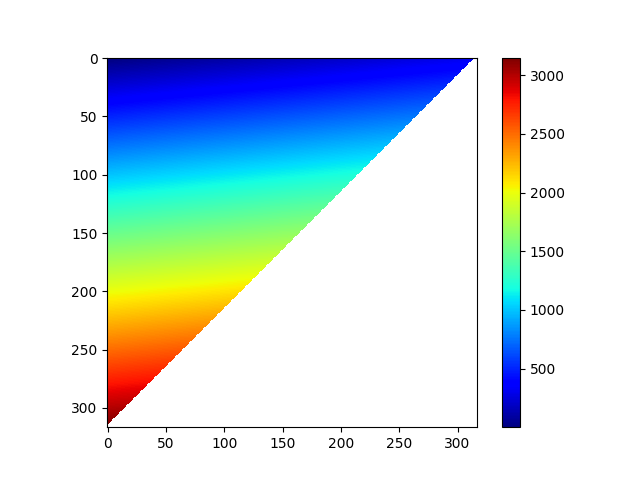

In [9]:
plt.subplots()

Time_float = vectorized_float(Inductor_Sending_Time)

Time_float = delete_alternating(Time_float)

Time_float_masked = np.ma.masked_where(Time_float == 0, Time_float)

c = plt.imshow(Time_float_masked,cmap=cm.jet)
plt.colorbar(c)

In [25]:
Voltage_Accumulation_Inductor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))
Current_Accumulation_Inductor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))

Voltage_Accumulation_Capacitor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))
Current_Accumulation_Capacitor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))

# for layer_number in range(0,Merge_Full.Number_of_Layers):
for layer_number in range(0,4):
        print("Layer "+str(layer_number))
        ## Set Index    
        Centre_Index_x = 2*layer_number
        Centre_Index_y = 0
        
        for node_number in range(0,layer_number+1):
                if(node_number == 0 and layer_number ==0):
                        print("ORIGIN NODE")
                        
                elif(node_number == 0 ):
                        print("first node : "+str(Centre_Index_x)+" ; "+str(Centre_Index_y))
                elif(node_number == layer_number):
                        print("last node : "+str(Centre_Index_x)+" ; "+str(Centre_Index_y))
                else:
                        print(str(node_number)+" : "+str(Centre_Index_x)+" ; "+str(Centre_Index_y))
                        
                Centre_Index_x -= 2
                Centre_Index_y += 2
                

Layer 0
ORIGIN NODE
Layer 1
first node : 2 ; 0
last node : 0 ; 2
Layer 2
first node : 4 ; 0
1 : 2 ; 2
last node : 0 ; 4
Layer 3
first node : 6 ; 0
1 : 4 ; 2
2 : 2 ; 4
last node : 0 ; 6


In [11]:
Merge_Full.LCM

Decimal('10.0')

In [12]:
Merge_Full.GCD

Decimal('1')

In [13]:
Merge_Full.Inductor_LCM_Factor

1

In [14]:
Merge_Full.Capacitor_LCM_Factor

10